# Importação das Bibliotecas Necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy import stats as st

# 1. Ler os arquivos


In [4]:
data0 = pd.read_csv('./datasets/geo_data_0.csv')
data1 = pd.read_csv('../datasets/geo_data_1.csv')
data2 = pd.read_csv('./datasets/geo_data_2.csv')

In [5]:
def analise_inicial(df):
    print("Info:")
    df.info()
    print("\n")

    print("Shape:")
    print(df.shape)
    print("\n")

    print("Valores nulos:")
    print(df.isna().sum())
    print("\n")

    print("Linhas duplicadas:")
    print(df.duplicated().sum())
    print("\n")

# Data0
analise_inicial(data0)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Shape:
(100000, 5)


Valores nulos:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Linhas duplicadas:
0




In [6]:
# Data1
analise_inicial(data1)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Shape:
(100000, 5)


Valores nulos:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Linhas duplicadas:
0




In [7]:
# Data2
analise_inicial(data2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Shape:
(100000, 5)


Valores nulos:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Linhas duplicadas:
0




Em nenhum dos dataframes há linhas duplicadas ou valores nulos. Todos eles são íntegros.

# 2. Construir modelo para predizer o volume de reservas nos poços

## 2.1 Conjunto de dados data0

In [11]:
X = data0.drop(columns=['id', 'product'])
y = data0['product']

In [12]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
y_pred_mean = y_pred.mean()

In [13]:
data0_inter = pd.DataFrame({'product': y_test, 'predicted': y_pred})
data0_final = data0_inter.merge(data0, left_index=True, right_index=True).drop(columns=['f0','f1','f2','product_y']).reset_index(drop=True)
data0_final

,product_x,predicted,id
0,122.073350,101.901017,7C6bA
1,48.738540,78.217774,dVxsn
2,131.338088,115.266901,1Gm3l
3,88.327757,105.618618,Nzg1t
4,36.959266,97.980185,Z7b4F
...,...,...,...
24995,148.821520,105.076959,pXFCs
24996,123.454003,74.768176,tf6nq
24997,91.945213,82.544397,pv8T0
24998,149.295563,81.826689,nol4A


In [14]:
print(f'A predição de volume médio é de {y_pred_mean}. \nO REQM é de {rmse}.')

A predição de volume médio é de 92.3987999065777. 
O REQM é de 37.75660035026169.


## Criação da função

In [16]:
def oil_prediction(data):
    X = data.drop(columns=['id','product'])
    y = data['product']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    df_data = pd.DataFrame({'product': y_test, 'predicted': y_pred})

    data_final = df_data.merge(data, left_index=True, right_index=True).drop(columns=['f0','f1','f2','product_y']).reset_index(drop=True)

    vol_med = df_data['predicted'].mean()

    return y_pred, rmse, data_final, vol_med

In [17]:
results_1 = oil_prediction(data1)

In [18]:
data1_final = results_1[2]
data1_final

,product_x,predicted,id
0,0.000000,0.844738,fYVDK
1,53.906522,52.921612,3SQcq
2,134.766305,135.110385,hQ1gJ
3,107.813044,109.494863,Y4vux
4,0.000000,-0.047292,H1NUw
...,...,...,...
24995,107.813044,108.351600,Vn3pL
24996,53.906522,53.604049,zZe7H
24997,26.953261,26.708734,iefIy
24998,110.992147,109.823087,CFT5B


In [19]:
print(f'O volume médio de reservas é de {results_1[3]}')
print(f'O REQM é de {results_1[1]}')

O volume médio de reservas é de 68.71287803913762
O REQM é de 0.8902801001028758


## Conjunto de dados data2

In [21]:
results_2 = oil_prediction(data2)

In [22]:
data2_final = results_2[2]
data2_final

,product_x,predicted,id
0,117.441301,98.301916,sPjbT
1,47.841249,101.592461,1u4uo
2,45.883483,52.449099,kZ6HO
3,139.014608,109.922127,gCZGK
4,84.004276,72.411847,rqJHx
...,...,...,...
24995,40.797226,102.764169,hMnQH
24996,87.144239,93.431823,KGq37
24997,52.039812,64.098390,CKCjb
24998,136.961454,83.764135,ANcQx


In [23]:
print(f'O volume médio de reservas é de {results_2[3]}')
print(f'O REQM é de {results_2[1]}')

O volume médio de reservas é de 94.77102387765936
O REQM é de 40.14587231134218


# 3. Escolher os poços que têm os maiores valores estimados


### 3.1 Armazenar os valores necessários para os cálculos em variáveis separadas

In [26]:
investimento = 100000000
pocos = 200
limite = 500000
unidades_limite = 111.1
valor_barril = 4.5
valor_unidade = 4500


### 3.2 Comparação do volume médio por região com os limites

In [28]:
# Região 0

data0_media = data0_final['predicted'].mean()
data1_media = results_1[3]
data2_media = results_2[3]

print(f'O volume médio de reservas da região 0 é de {data0_media}, \no volume médio de reservas da região 1 é de {data1_media}, \no volume médio de reservas da região 2 é de {data2_media}')

O volume médio de reservas da região 0 é de 92.3987999065777, 
o volume médio de reservas da região 1 é de 68.71287803913762, 
o volume médio de reservas da região 2 é de 94.77102387765936


### 3.3 Forneça conclusões

Nenhuma das três regiões possui uma média de unidades necessária para evitar prejuízos, quando calculado pela média de todas as predições (2.500 poços).


# 4. Escolher a região com o maior lucro total para os poços selecionados


### 4.1 Escolher os 200 poços com os valores mais altos previstos para cada uma das regiões


In [33]:
def top200(data):
    top200 = data.sort_values(by='predicted', ascending=False).iloc[:200].reset_index(drop=True)
    return top200

In [34]:
reg_0_top200 = top200(data0_final)
reg_1_top200 = top200(data1_final)
reg_2_top200 = top200(data2_final)

In [35]:
top_200_df = pd.DataFrame({'Região 0': reg_0_top200['predicted'], 'Região 1': reg_1_top200['predicted'], 'Região 2': reg_2_top200['predicted']})

### 3.3 Calcule o lucro potencial dos melhores 200 poços por região.

In [37]:
def lucro_por_região(data, valor_unidade):
    lucro = []
    for _, row in data.iterrows():
        luc = row['predicted'] * valor_unidade
        lucro.append(luc)
    return lucro


In [38]:
regiao_0 = lucro_por_região(reg_0_top200, valor_unidade)
regiao_1 = lucro_por_região(reg_1_top200, valor_unidade)
regiao_2 = lucro_por_região(reg_2_top200, valor_unidade)

In [39]:
len(regiao_0), len(regiao_1), len(regiao_2)

(200, 200, 200)

In [40]:
lucro = pd.DataFrame({'Região 0': regiao_0, 'Região 1': regiao_1, 'Região 2': regiao_2})
lucro

,Região 0,Região 1,Região 2
0,794412.467126,629924.746213,767381.442244
1,793235.294386,628653.615486,763529.995038
2,779622.767428,628274.449800,743853.257174
3,777612.184231,627816.457339,740762.530366
4,777352.394998,627624.952638,737837.998979
...,...,...,...
195,661286.937690,622927.521654,641742.708851
196,661269.438402,622923.749578,641532.938553
197,661263.673315,622919.195337,641162.375973
198,661259.315693,622909.565248,640679.478318


In [61]:
total_0 = lucro['Região 0'].sum()
total_1 = lucro['Região 1'].sum()
total_2 = lucro['Região 2'].sum()
print(f'O lucro potencial total da região 0 é de {total_0}')
print(f'O lucro potencial total da região 1 é de {total_1}')
print(f'O lucro potencial total da região 2 é de {total_2}')
print(f'A região com o maior lucro potecial é a Região 0')

O lucro potencial total da região 0 é de 138966584.79666126
O lucro potencial total da região 1 é de 124869381.1499898
O lucro potencial total da região 2 é de 133779815.13714898
A região com o maior lucro potecial é a Região 0


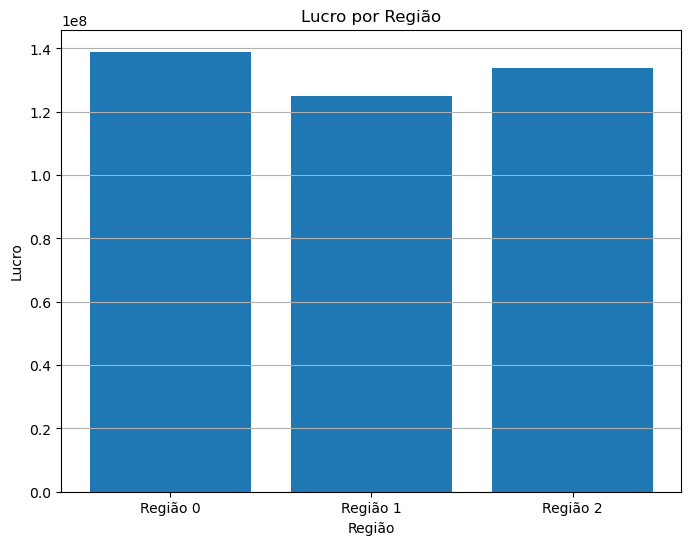

In [63]:

Região = ['Região 0', 'Região 1', 'Região 2']
Lucro = [total_0, total_1, total_2]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(Região, Lucro)

# Add labels and title
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.title('Lucro por Região')
plt.grid(axis='y')

plt.show()

# 5. Cáculo do risco

## 5.1 Bootstrapping com 1000 amostrar para encontrar a distribuição de lucros


In [65]:
def lucro_por_regiao(data, num_amostras=1000):
    lucros = []
    for _ in range(num_amostras):
        amostra = data.sample(frac=1, replace=True)
        lucro = (amostra['predicted'] * 4500).sum()
        lucros.append(lucro)


    return lucros

In [66]:
regiao_0_boot = lucro_por_regiao(data0_final)
regiao_1_boot = lucro_por_regiao(data1_final)
regiao_2_boot = lucro_por_regiao(data2_final)

In [67]:
len(regiao_0_boot), len(regiao_1_boot), len(regiao_2_boot)

(1000, 1000, 1000)

In [68]:
lucro_bootstrapped = pd.DataFrame({'Região 0': regiao_0_boot, 'Região 1': regiao_1_boot, 'Região 2': regiao_2_boot})
lucro_bootstrapped

,Região 0,Região 1,Região 2
0,1.039819e+10,7.716869e+09,1.065612e+10
1,1.038562e+10,7.700867e+09,1.067336e+10
2,1.039829e+10,7.827340e+09,1.068581e+10
3,1.039252e+10,7.654098e+09,1.066848e+10
4,1.042820e+10,7.748097e+09,1.067021e+10
...,...,...,...
995,1.040173e+10,7.709202e+09,1.069242e+10
996,1.037144e+10,7.725178e+09,1.065579e+10
997,1.038800e+10,7.689968e+09,1.067687e+10
998,1.037158e+10,7.734790e+09,1.069384e+10


In [69]:
total_0_boot = lucro_bootstrapped['Região 0'].sum()
total_1_boot = lucro_bootstrapped['Região 1'].sum()
total_2_boot = lucro_bootstrapped['Região 2'].sum()
print(f'O lucro potencial total da região 0 é de {total_0_boot}, \no lucro potencial total da região 1 é de {total_1_boot}, \no lucro potencial total da região 2 é de {total_2_boot}')


O lucro potencial total da região 0 é de 10394937177106.934, 
o lucro potencial total da região 1 é de 7729849466257.492, 
o lucro potencial total da região 2 é de 10661558137825.828


## 5.2 Lucro médio, intervalo de confiança 95% e risco de prejuízo. Prejuízo é um lucro negativo, calcular como probabilidade e depois expressar como porcentagem

In [71]:
def estatisticas_regiao(data, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(sample.mean())

    lucro_medio = np.mean(bootstrap_means)
    intervalo_de_confianca = np.percentile(bootstrap_means, [2.5, 97.5])
    risco_de_prejuizo = (np.array(bootstrap_means) < 0).mean() * 100

    return lucro_medio, intervalo_de_confianca, risco_de_prejuizo


results = {}
for region, profits in top_200_df.items():
    lucro_medio, intervalo_de_confianca, risco_de_prejuizo = estatisticas_regiao(profits)
    results[region] = {
        'Lucro médio': lucro_medio,
        'Intervalo de Confiança 95%': intervalo_de_confianca,
        'Risco de Prejuízo (%)': risco_de_prejuizo
    }


results_df = pd.DataFrame(results)
print(results_df)




                                                           Região 0  \
Lucro médio                                              154.406135   
Intervalo de Confiança 95%  [153.5697215431774, 155.23554565035295]   
Risco de Prejuízo (%)                                           0.0   

                                                           Região 1  \
Lucro médio                                              138.742666   
Intervalo de Confiança 95%  [138.7041406401779, 138.78197749364088]   
Risco de Prejuízo (%)                                           0.0   

                                                           Região 2  
Lucro médio                                              148.652022  
Intervalo de Confiança 95%  [147.92941986451427, 149.4517763062803]  
Risco de Prejuízo (%)                                           0.0  


In [86]:
def train_and_evaluate_model(data):
    features = data.drop(columns=["id", "product"], axis=1)
    target = data["product"]         

    features_train,features_valid,target_train,target_valid = train_test_split(
        features,
        target,
        test_size= 0.25
    )
    
    model = LinearRegression()
    model.fit(features_train,target_train)
    predict_date = model.predict(features_valid) 


    rmse = root_mean_squared_error(target_valid, predict_date,squared=False)


    mean_reserve= predict_date.mean()
    
    output= pd.DataFrame(dict(predicted_value=predict_date, real_value=target_valid))
    return output

In [88]:
regions = ["region_0", "region_1", "region_2"]
datas = [data0, data1, data2]
predict_region = {}
        
for data, region in zip(datas, regions): 
    predict_region[region] = train_and_evaluate_model(data)  

NameError: name 'root_mean_squared_error' is not defined

In [90]:
def calculate_profit(df):
    best_wells = df.sort_values(by="predicted_value", ascending=False)['real_value'].head(200) 
    total_volume = best_wells.sum() 
    potential_profit = (total_volume * revenue_per_product_unit) - development_cost
    return potential_profit

In [92]:
revenue_per_product_unit = 4500
development_cost = 100000000

In [94]:
def calculate_bootstrap(
    data, 
    revenue_per_barrel=revenue_per_product_unit, 
    development_cost_per_well=development_cost, 
    total_samples=1000, 
    sample_size=500
):
    profits = []
    for _ in range(total_samples):
        sampled_data = data.sample(n=sample_size, replace=True)
        profit = calculate_profit(sampled_data)
        profits.append(profit)
    return pd.Series(profits)

In [96]:
region_0_results = calculate_bootstrap(
    predict_region['region_0']
)

KeyError: 'region_0'

In [98]:
loss_risk = ((region_0_results < 0).mean()) 
loss_risk


NameError: name 'region_0_results' is not defined

In [ ]:
predict_region

In [ ]:
def calculate_profit(df):
    best_wells = df.sort_values(by="predicted_value", ascending=False)['real_value'].head(200) 
    total_volume = best_wells.sum() 
    potential_profit = (total_volume * revenue_per_product_unit) - development_cost
    return potential_profit

In [ ]:
# Data1

print("Lucros total:", calculate_profit(predict_region['region_1']))
print("\n")
print('Bootstrap\n',calculate_bootstrap(predict_region['region_1']))
region_1_results = calculate_bootstrap(
    predict_region['region_1']
)
loss_risk = ((region_1_results < 0).mean())
print("\n")
print(f'Resultados região 1\n {region_1_results}')
print("\n")
print(f'Risco de perda = {loss_risk}')


In [ ]:
print("Lucros total:", calculate_profit(predict_region['region_2']))
print("\n")
print('Bootstrap\n',calculate_bootstrap(predict_region['region_2']))
region_2_results = calculate_bootstrap(
    predict_region['region_2']
)
loss_risk = ((region_2_results < 0).mean())
print("\n")
print(f'Resultados região 2\n {region_2_results}')
print("\n")
print(f'Risco de perda = {loss_risk}')


## 5.3 Conclusões: sugerir uma região para desenvolvimento de poços de petróleo e justificativa. A escolha corresponde à anterior?

Nenhuma das três regiões apresentou risco de prejuízos quando avaliados os melhores 200 poços de cada uma delas e aplicada a técnica de bootstrapping.

A melhor região onde deveriam ser aplicados os recursos é a Região 0, uma vez que seu potencial de produção/lucro é o mais elevado.